<a href="https://colab.research.google.com/github/Priyanka-Jainkar/My-work/blob/master/Unsupervised_Machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
In this code unsupervised Machine learning is done on the Iris data set using two methods:
1. K-Means clustering
2. Hierarchical clustering


In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
from google.colab import files
data_upload= files.upload()

Saving Iris.csv to Iris (4).csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(data_upload['Iris.csv']))

**Basic EDA of the given dataset using the seaborn function**

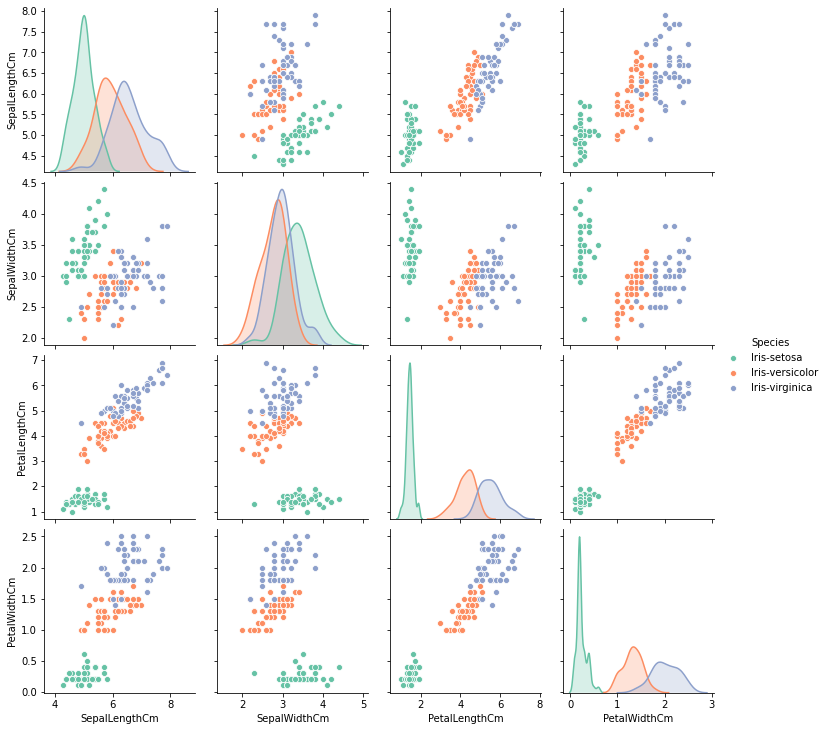

In [ ]:
# ID is not the feature of flowers, So the ID column is dropped.
df.drop(["Id"], axis=1, inplace=True)
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

from the above sns plot, Iris-setosa can easily be identified as it stands different.But, we have **to perform the unsupervised learning. Lets, adjust the dataset.**

Only the features are extracted from the data set as it will be useful for clustering.

In [ ]:
iris= df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.shape

(150, 4)

while performing K-means clustering, we need to identify the number of clusters. Let us identify the clusters by using the elbow method

In [ ]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i)           
    model.fit(iris)
    wcss.append(model.inertia_)

Plot the results on the line graph to observe the 'The Elbow'

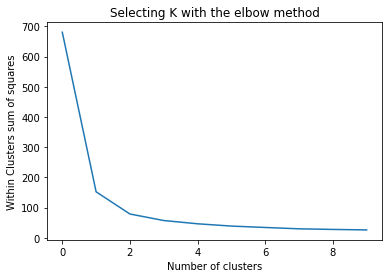

In [ ]:
plt.plot(wcss)
plt.title('Selecting K with the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Clusters sum of squares') # Within cluster sum of squares
plt.show()


In the above graph, we can observe that the results has no changes from the cluster number 3 i.e the wcss does not reduce with the furthur iterations. 
**Hence, from the above observation the optimum number of clusters is 3**

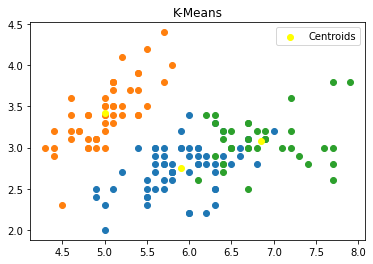

In [ ]:
#calculating and plotting k means for 3 clusters
model=KMeans(n_clusters=3)
y_pred= model.fit_predict(iris)
centers=model.cluster_centers_

x= iris.to_numpy()
plt.title("K-Means")
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1])
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1])
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

The plot shows the datapoints in the form of 3 cluster. Now, lets observe the unsupervised learning using Hierarchical clustering.

**Implementation of Hierarchical clustering**: 
There are two methods in hierarchical clustering:

1.   Agglomerative
2.   Divise

We will be implementing Hierarchical clustering using Agglomerative method. The Agglomerative method is represented in the form of Dendogram.





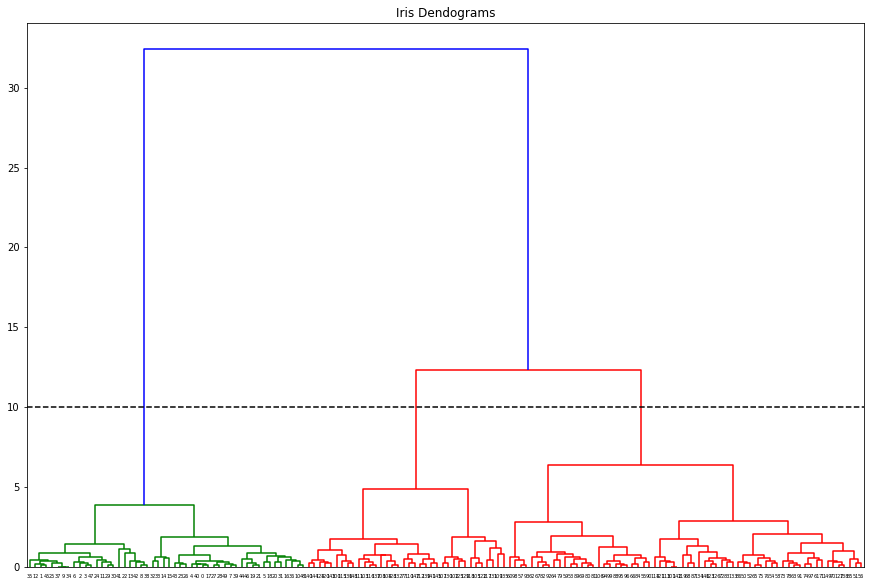

In [ ]:
import scipy.cluster.hierarchy as shc

mergings =shc.linkage(iris, method='ward')
plt.figure(figsize=(15,10))
plt.title("Iris Dendograms")
plt.axhline(y=10,c='k', linestyle='--')
shc.dendrogram(mergings,leaf_rotation=0)
plt.show()

Dendogram is useful for identifying the number of clusters. From the above graph we see the longest vertical line without any perperndicular lines. The dotted line in the above graph crosses 3 vertical lines. Therefore the number of clusters determined using Hierarchical clustering is 3. 


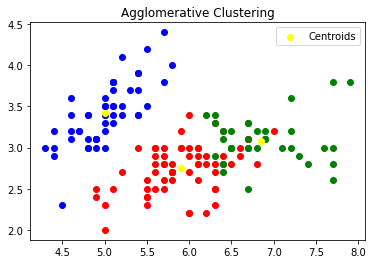

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
pred=cluster.fit_predict(iris)
cl= iris. to_numpy()
#plt.scatter(x[:,0], x[:,1], c=cluster.labels_, cmap='rainbow')
plt. title("Agglomerative Clustering")
plt.scatter(cl[pred == 0, 0], cl[pred == 0, 1], c= 'red')
plt.scatter(cl[pred == 1, 0], cl[pred == 1, 1], c = 'blue')
plt.scatter(cl[pred == 2, 0], cl[pred == 2, 1], c = 'green')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

from the above graph, we can see that the datapoints are represented in the form of clusters. Therefore, by comparing the graphs of Agglomerative clustering and K-means clustering, it shows that optimum number of cluster is 3

**Now let us Evaluate the result and compare them.**

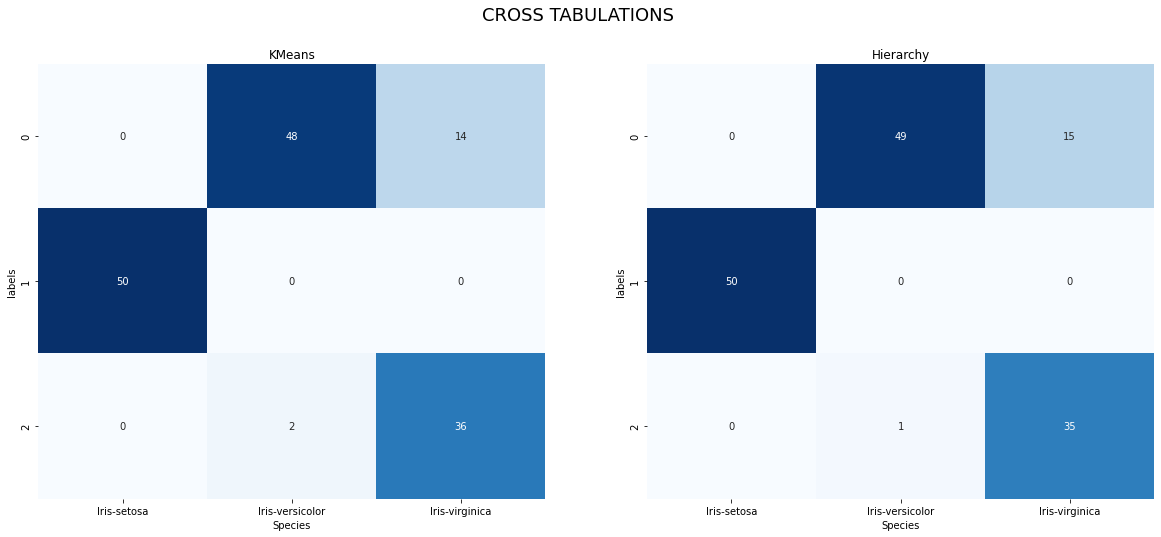

In [ ]:

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':y_pred,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':pred,"Species":df['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])

plt.figure(figsize=(20,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()


**Conclusion:**
*   From the above cross tabulations, it is observed that, the Iris-Setosa cluster has 100% evalution. The clustering of it was easy as its data points are easily differentiable.

*  The Iris-Versicolor cluster gives 96-98% of evaluation from its cluster of 50 datapoints.
*   The Iris-Virginica cluster gives 70-72% of evaluation from its cluster of 50 datapoints
*   16 out of 150 datapoints failed to be clustered properly by both the techniques. The maximum points are from Iris-Virginica, this shows that its datapoints are hard to differentiate.

*   Therefore the evaluation of both the techniques is 90%.







